In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error, r2_score
import xgboost

In [133]:
import pickle

In [3]:
df = pd.read_csv("df_data1.csv")
df1 = pd.read_csv("Final_data3.csv")

In [5]:
df

,city,Fuel Type,Kms Driven,Seats,transmission,ownerNo,model,modelYear,Mileage,Engine,Insurance Validity,Features,Comfort & Convenience,Interior,Exterior,Safety,price
0,Bangalore,Petrol,120000,5,Manual,3,Maruti Celerio,2015,23.10,998,Third Party insurance,8,10,7,5,13,4.00
1,Bangalore,Petrol,32706,5,Manual,2,Ford Ecosport,2018,17.00,1497,Comprehensive,8,10,7,5,13,8.11
2,Bangalore,Petrol,11949,5,Manual,1,Tata Tiago,2018,23.84,1199,Comprehensive,8,10,7,5,13,5.85
3,Bangalore,Petrol,17794,5,Manual,1,Hyundai Xcent,2014,19.10,1197,Comprehensive,8,10,7,5,13,4.62
4,Bangalore,Diesel,60000,5,Manual,1,Maruti SX4 S Cross,2015,23.65,1248,Third Party insurance,8,10,7,5,13,7.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6071,Kolkata,Petrol,40000,5,Automatic,1,Maruti Ciaz,2017,19.12,1373,Third Party insurance,8,10,7,5,13,5.25
6072,Kolkata,Petrol,20000,5,Manual,1,Hyundai Creta,2019,15.80,1591,Third Party insurance,8,10,7,5,13,10.00
6073,Kolkata,Petrol,40000,5,Manual,1,Maruti Swift Dzire,2019,21.21,1197,Third Party insurance,8,10,7,5,13,5.50
6074,Kolkata,Petrol,60000,5,Manual,1,Maruti Swift Dzire,2010,17.50,1298,Third Party insurance,8,10,7,5,13,2.50


In [7]:
df1.head(2)

,city,it,ft,bt,km,transmission,ownerNo,owner,oem,model,...,Seats or Wheel Size,Color,Engine Type,Displacement,Fuel Suppy System,Gear Box,car_links,Max_Torque,Max_power,RPM
0,Bangalore,0,Petrol,Hatchback,120000,Manual,3,3,Maruti,Maruti Celerio,...,5,White,K10B Engine,998,MPFi,5 Speed,https://www.cardekho.com/used-car-details/used...,90Nm,67.04bhp,6000rpm
1,Bangalore,0,Petrol,SUV,32706,Manual,2,2,Ford,Ford Ecosport,...,16,White,Ti-VCT Petrol Engine,1497,Direct Injection,5 Speed,https://www.cardekho.com/buy-used-car-details/...,150Nm,121.31bhp,6500rpm


In [9]:
columns_to_remove = ['Features', 'Comfort & Convenience', 'Interior', 'Exterior','Safety', 'Seats'] 
df = df.drop(columns=columns_to_remove)

In [11]:
df['model'] = df1['oem']
df['body_type'] = df1['bt']

In [13]:
df.head(2)

,city,Fuel Type,Kms Driven,transmission,ownerNo,model,modelYear,Mileage,Engine,Insurance Validity,price,body_type
0,Bangalore,Petrol,120000,Manual,3,Maruti,2015,23.1,998,Third Party insurance,4.00,Hatchback
1,Bangalore,Petrol,32706,Manual,2,Ford,2018,17.0,1497,Comprehensive,8.11,SUV


In [15]:
df = df.rename(columns={'Fuel Type': 'fuel_type', 'Kms Driven': 'kms_driven', 'modelYear': 'model_year', 'Insurance Validity': 'insurance_validity', 'Mileage': 'mileage'})

In [17]:
df['price'] = df['price'] * 100000

In [19]:
df['Age'] = 2023 - df['model_year']
df['Price_per_Mile'] = df['price'] / df['mileage']

In [21]:
df.head(2)

,city,fuel_type,kms_driven,transmission,ownerNo,model,model_year,mileage,Engine,insurance_validity,price,body_type,Age,Price_per_Mile
0,Bangalore,Petrol,120000,Manual,3,Maruti,2015,23.1,998,Third Party insurance,400000.0,Hatchback,8,17316.017316
1,Bangalore,Petrol,32706,Manual,2,Ford,2018,17.0,1497,Comprehensive,811000.0,SUV,5,47705.882353


In [24]:
df.isnull().sum()

city                  0
fuel_type             0
kms_driven            0
transmission          0
ownerNo               0
model                 0
model_year            0
mileage               0
Engine                0
insurance_validity    0
price                 0
body_type             0
Age                   0
Price_per_Mile        0
dtype: int64

In [26]:
df.shape

(6076, 14)

In [28]:
df.duplicated().sum()

63

In [30]:
df.drop_duplicates(inplace = True)

In [32]:
df.shape

(6013, 14)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6013 entries, 0 to 6075
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city                6013 non-null   object 
 1   fuel_type           6013 non-null   object 
 2   kms_driven          6013 non-null   int64  
 3   transmission        6013 non-null   object 
 4   ownerNo             6013 non-null   int64  
 5   model               6013 non-null   object 
 6   model_year          6013 non-null   int64  
 7   mileage             6013 non-null   float64
 8   Engine              6013 non-null   int64  
 9   insurance_validity  6013 non-null   object 
 10  price               6013 non-null   float64
 11  body_type           6013 non-null   object 
 12  Age                 6013 non-null   int64  
 13  Price_per_Mile      6013 non-null   float64
dtypes: float64(3), int64(5), object(6)
memory usage: 704.6+ KB


In [36]:
for col in df.columns:
    print('Unique Values of ' + col +':')
    print(df[col].unique())
    print("========================")

Unique Values of city:
['Bangalore' 'chennai' 'delhi' 'Hyderabad' 'Jaipur' 'Kolkata']
Unique Values of fuel_type:
['Petrol' 'Diesel' 'LPG' 'CNG' 'Electric']
Unique Values of kms_driven:
[120000  32706  11949 ...  72561  53562  32190]
Unique Values of transmission:
['Manual' 'Automatic']
Unique Values of ownerNo:
[3 2 1 4 5]
Unique Values of model:
['Maruti' 'Ford' 'Tata' 'Hyundai' 'Jeep' 'Datsun' 'Honda' 'Mahindra'
 'Renault' 'Mercedes-Benz' 'Audi' 'BMW' 'Toyota' 'Mini' 'Kia' 'Skoda'
 'Volkswagen' 'Nissan' 'Fiat' 'Mahindra Ssangyong' 'Mitsubishi' 'Jaguar'
 'Land Rover' 'Chevrolet' 'Mahindra Renault' 'Volvo' 'Isuzu' 'Lexus'
 'Porsche']
Unique Values of model_year:
[2015 2018 2014 2020 2017 2019 2016 2011 2013 2010 2022 2006 2012 2021
 2008 2009 2005 2007 2023 2004 2003 2002]
Unique Values of mileage:
[ 23.1         17.          23.84        19.1         23.65
  17.1         20.63        20.28        18.9         18.2
  15.1         21.27        17.8         16.42        17.4
  20.3     

In [42]:
#import re
#df['no_of_gears'] = df['no_of_gears'].apply(lambda x: re.search(r'\d+', str(x)).group(0) if re.search(r'\d+', str(x)) else None)

In [38]:
df.head(3)

,city,fuel_type,kms_driven,transmission,ownerNo,model,model_year,mileage,Engine,insurance_validity,price,body_type,Age,Price_per_Mile
0,Bangalore,Petrol,120000,Manual,3,Maruti,2015,23.10,998,Third Party insurance,400000.0,Hatchback,8,17316.017316
1,Bangalore,Petrol,32706,Manual,2,Ford,2018,17.00,1497,Comprehensive,811000.0,SUV,5,47705.882353
2,Bangalore,Petrol,11949,Manual,1,Tata,2018,23.84,1199,Comprehensive,585000.0,Hatchback,5,24538.590604


In [40]:
df.isnull().sum()

city                  0
fuel_type             0
kms_driven            0
transmission          0
ownerNo               0
model                 0
model_year            0
mileage               0
Engine                0
insurance_validity    0
price                 0
body_type             0
Age                   0
Price_per_Mile        0
dtype: int64

In [ ]:
# Box plots are great for visualizing the distribution of numerical features and identifying outliers.

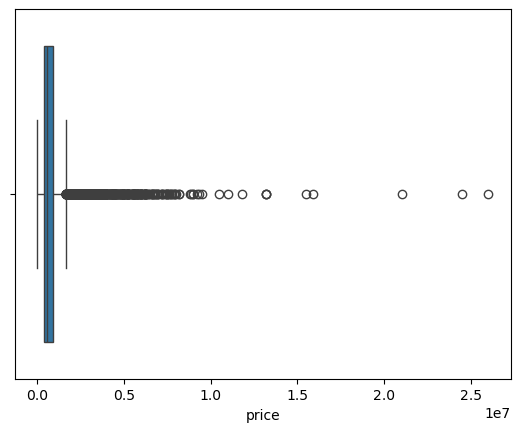

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example for visualizing price
sns.boxplot(x='price', data=df)
plt.show()


In [ ]:
# To visualize relationships between two continuous variables and see if there are outliers.

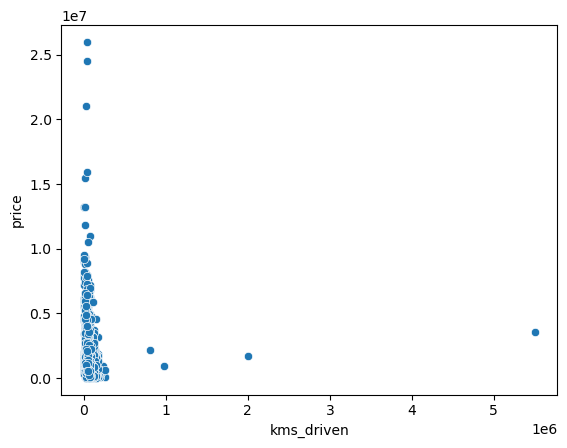

In [46]:
sns.scatterplot(x='kms_driven', y='price', data=df)
plt.show()

In [48]:
# To visualize the distribution of a single numeric variable.

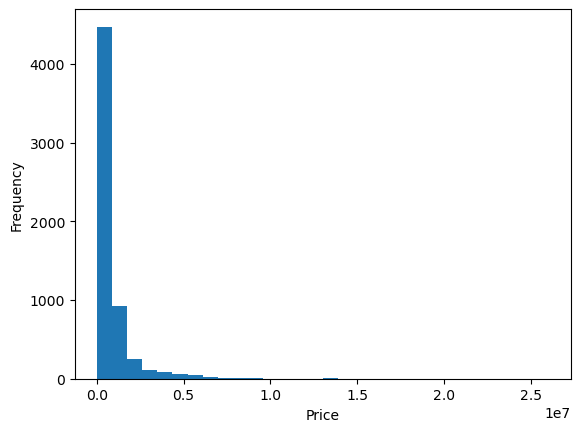

In [50]:
plt.hist(df['price'], bins=30)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# To visualize the relationships between multiple variables and identify potential outliers.

In [ ]:
your_dataframe['price'] = np.log(your_dataframe['price'])


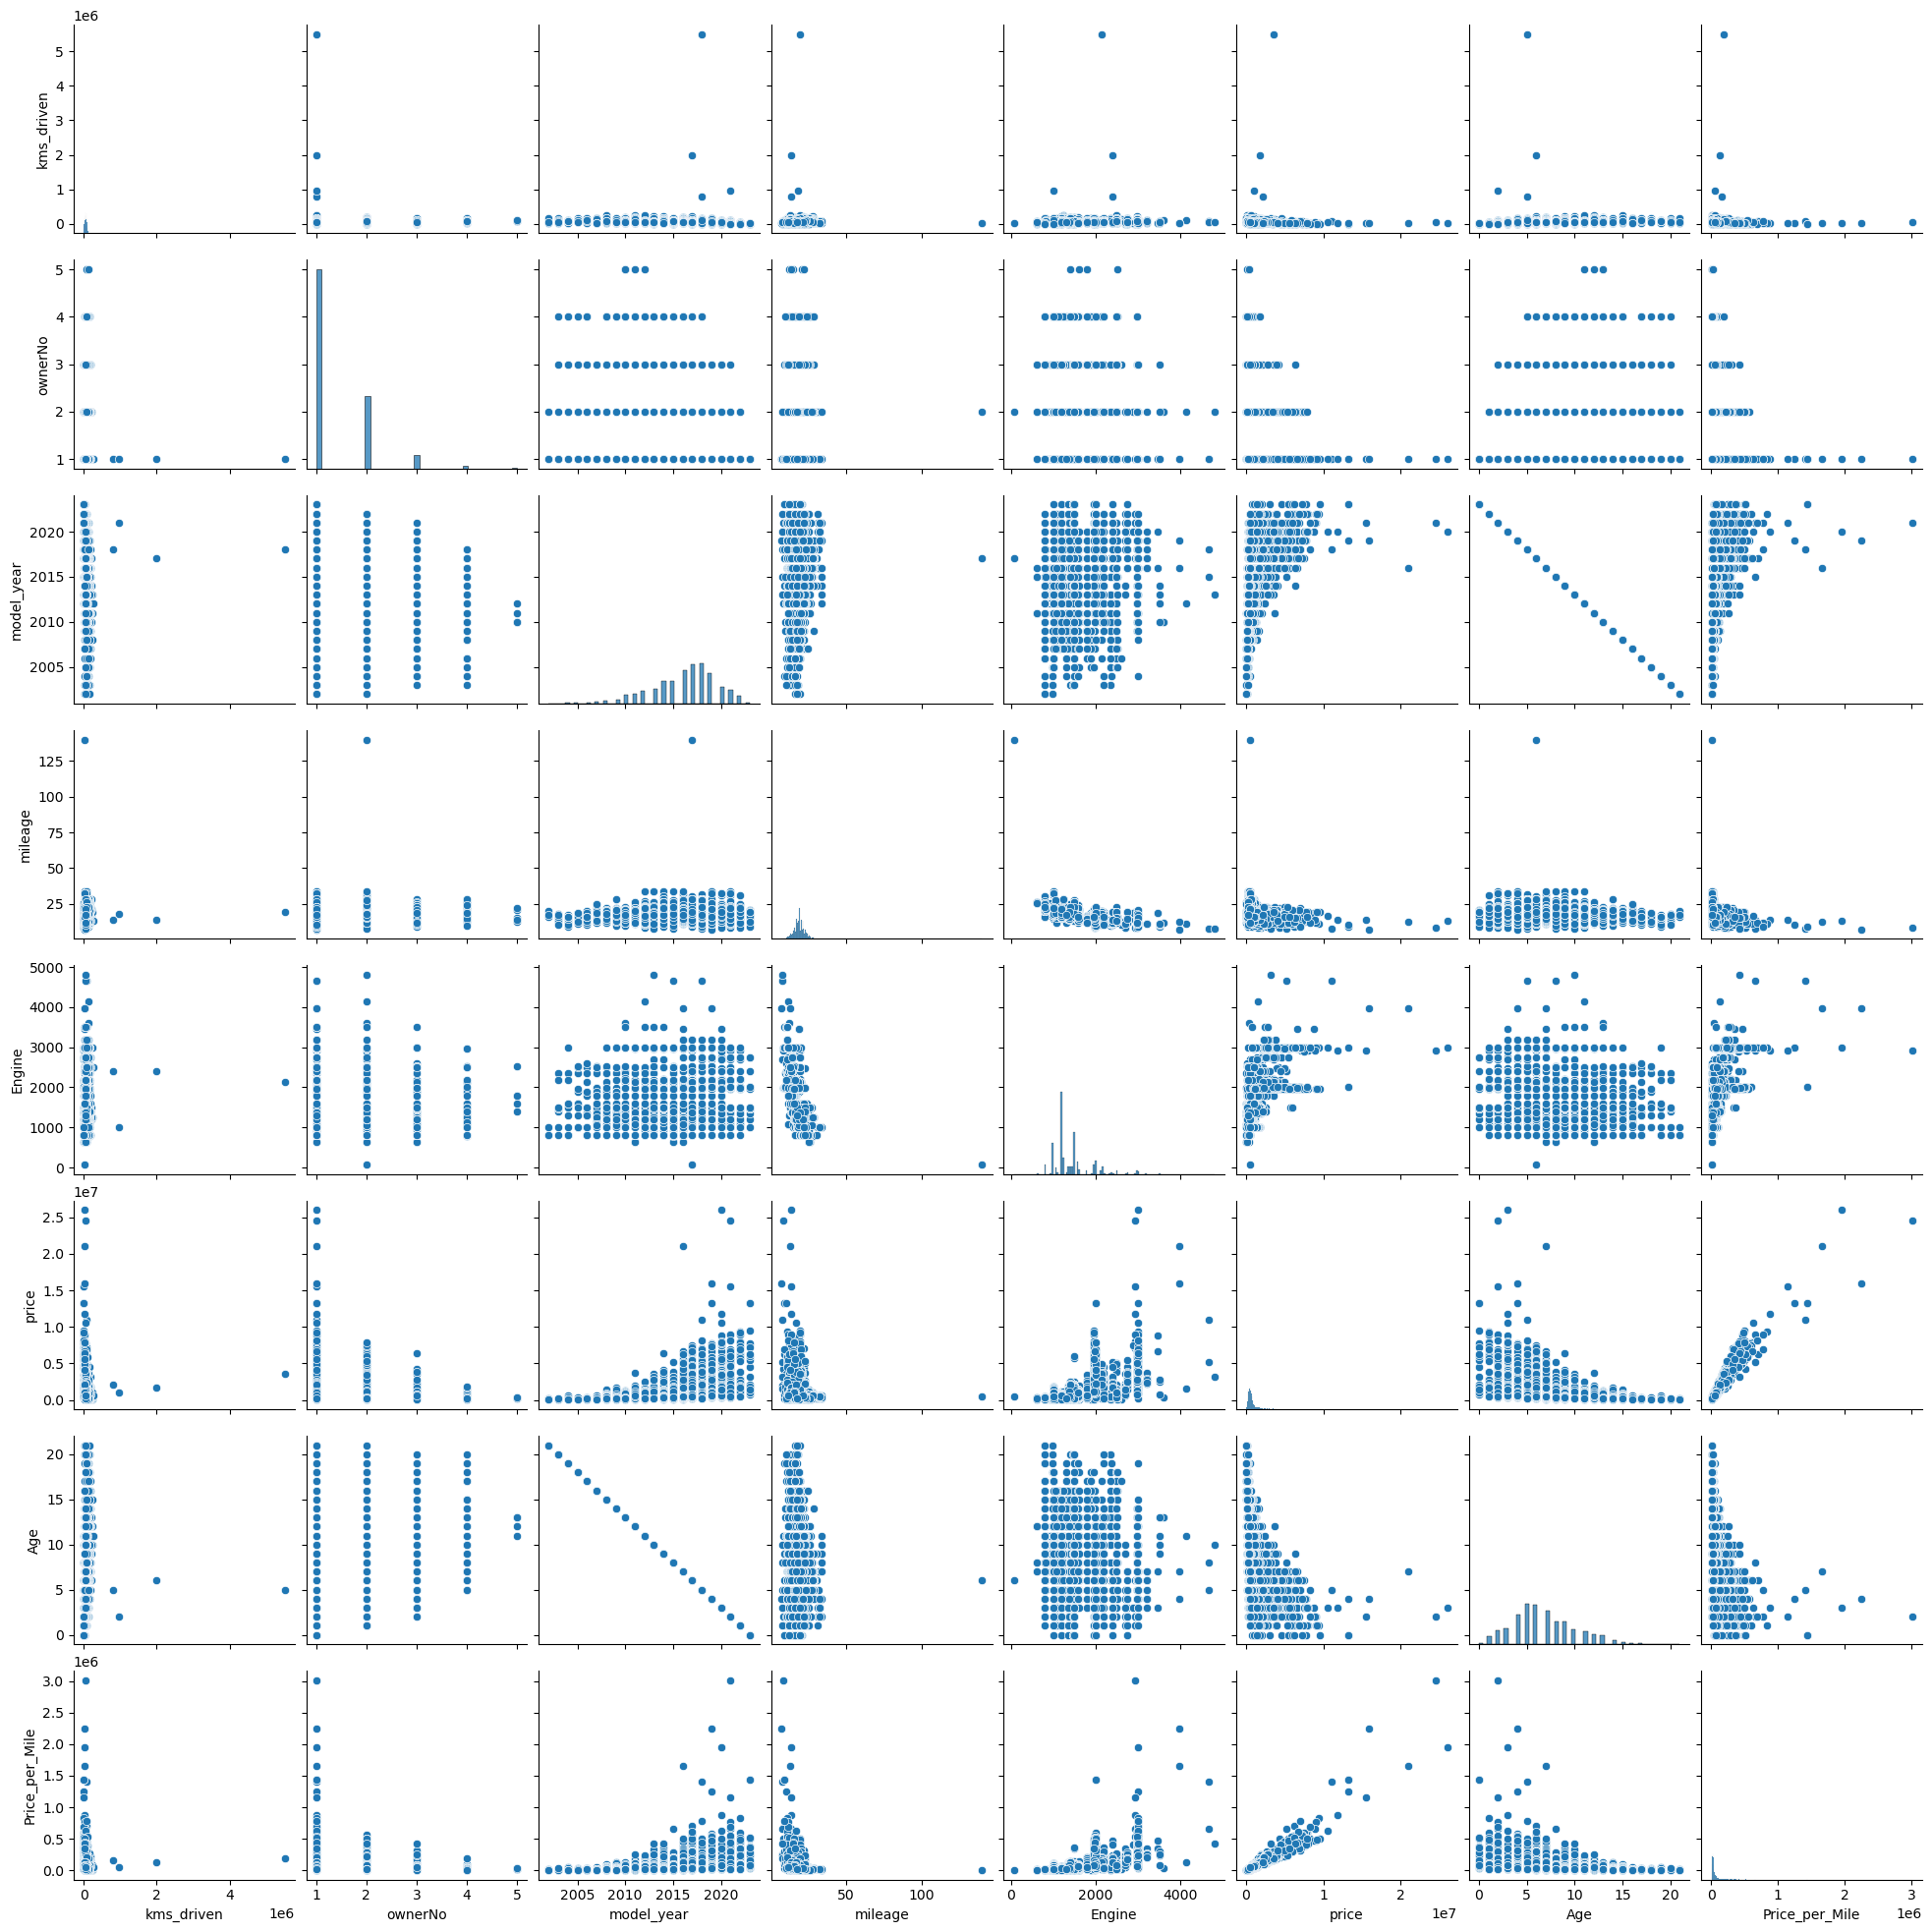

In [54]:
sns.pairplot(df)
plt.show()

In [ ]:
# IQR method
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_filtered = df[(df["price"] > lower_bound) & (df["price"] < upper_bound)]

In [56]:
# Log transformation
df["price_transformed"] = np.log(df["price"])

In [60]:
df.head(3)

,city,fuel_type,kms_driven,transmission,ownerNo,model,model_year,mileage,Engine,insurance_validity,price,body_type,Age,Price_per_Mile,price_transformed
0,Bangalore,Petrol,120000,Manual,3,Maruti,2015,23.10,998,Third Party insurance,400000.0,Hatchback,8,17316.017316,12.899220
1,Bangalore,Petrol,32706,Manual,2,Ford,2018,17.00,1497,Comprehensive,811000.0,SUV,5,47705.882353,13.606023
2,Bangalore,Petrol,11949,Manual,1,Tata,2018,23.84,1199,Comprehensive,585000.0,Hatchback,5,24538.590604,13.279367


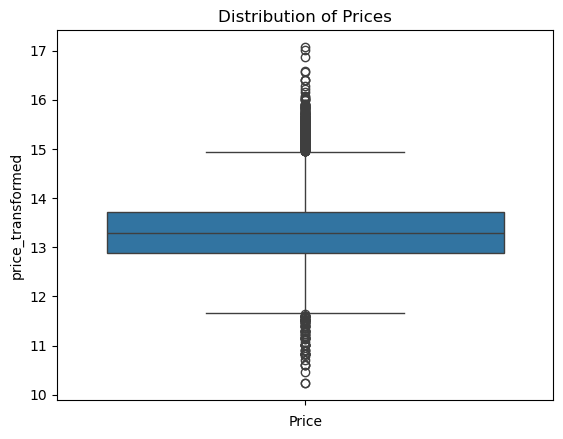

In [56]:
# Boxplot with Seaborn
sns.boxplot(df["price_transformed"])
plt.title("Distribution of Prices")
plt.xlabel("Price")
plt.show()

In [64]:
import plotly.graph_objects as go
import plotly.express as px

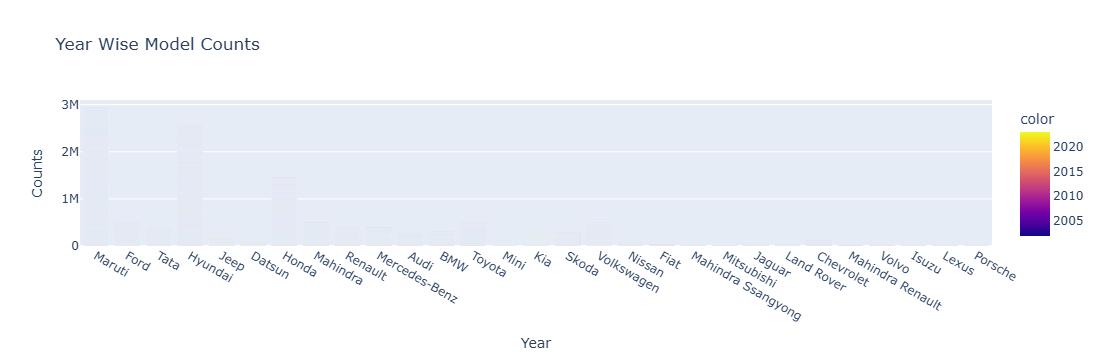

In [68]:
fig = px.bar(

    x = df['model'],
    y = df['model_year'],
    title= "Year Wise Model Counts",
    labels= {'x': "Year", 'y': 'Counts'},
    color = df['model_year'],
    color_discrete_map = {2012: "red" ,
                          2013: 'rose',
                          2014:'blue' , 
                          2015:'yellow', 
                          2016:'green',
                          2017:'orange', 
                          2018:'black'})

fig.show()

In [70]:
df.describe()

,kms_driven,ownerNo,model_year,mileage,Engine,price,Age,Price_per_Mile,price_transformed
count,6.013000e+03,6013.000000,6013.000000,6013.000000,6013.000000,6.013000e+03,6013.000000,6.013000e+03,6013.000000
mean,6.299788e+04,1.372859,2016.103110,19.143986,1449.669050,9.279646e+05,6.896890,5.586093e+04,13.352255
std,8.288138e+04,0.621746,3.404629,3.911874,471.574456,1.259715e+06,3.404629,1.014918e+05,0.804404
min,1.010000e+02,1.000000,2002.000000,7.080000,72.000000,2.800000e+04,0.000000,1.133603e+03,10.239960
25%,3.700000e+04,1.000000,2014.000000,17.000000,1197.000000,3.950000e+05,5.000000,1.910641e+04,12.886641
50%,5.874700e+04,1.000000,2017.000000,18.900000,1248.000000,5.900000e+05,6.000000,2.966057e+04,13.287878
75%,8.000000e+04,2.000000,2018.000000,21.400000,1582.000000,9.000000e+05,9.000000,5.157814e+04,13.710150
max,5.500000e+06,5.000000,2023.000000,140.000000,4806.000000,2.600000e+07,21.000000,3.013530e+06,17.073607


In [72]:
from sklearn.preprocessing import LabelEncoder

In [74]:
le = LabelEncoder()
le

LabelEncoder()

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6013 entries, 0 to 6075
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city                6013 non-null   object 
 1   fuel_type           6013 non-null   object 
 2   kms_driven          6013 non-null   int64  
 3   transmission        6013 non-null   object 
 4   ownerNo             6013 non-null   int64  
 5   model               6013 non-null   object 
 6   model_year          6013 non-null   int64  
 7   mileage             6013 non-null   float64
 8   Engine              6013 non-null   int64  
 9   insurance_validity  6013 non-null   object 
 10  price               6013 non-null   float64
 11  body_type           6013 non-null   object 
 12  Age                 6013 non-null   int64  
 13  Price_per_Mile      6013 non-null   float64
 14  price_transformed   6013 non-null   float64
dtypes: float64(4), int64(5), object(6)
memory usage: 751.6+ KB


In [78]:
df['city'] = le.fit_transform(df['city'])
df['fuel_type'] = le.fit_transform(df['fuel_type'])
df['transmission'] = le.fit_transform(df['transmission'])
df['model'] = le.fit_transform(df['model'])
df['insurance_validity'] = le.fit_transform(df['insurance_validity'])
df['body_type'] = le.fit_transform(df['body_type'])

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6013 entries, 0 to 6075
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city                6013 non-null   int32  
 1   fuel_type           6013 non-null   int32  
 2   kms_driven          6013 non-null   int64  
 3   transmission        6013 non-null   int32  
 4   ownerNo             6013 non-null   int64  
 5   model               6013 non-null   int32  
 6   model_year          6013 non-null   int64  
 7   mileage             6013 non-null   float64
 8   Engine              6013 non-null   int64  
 9   insurance_validity  6013 non-null   int32  
 10  price               6013 non-null   float64
 11  body_type           6013 non-null   int32  
 12  Age                 6013 non-null   int64  
 13  Price_per_Mile      6013 non-null   float64
 14  price_transformed   6013 non-null   float64
dtypes: float64(4), int32(6), int64(5)
memory usage: 610.7 KB


In [82]:
df.head()

,city,fuel_type,kms_driven,transmission,ownerNo,model,model_year,mileage,Engine,insurance_validity,price,body_type,Age,Price_per_Mile,price_transformed
0,0,4,120000,1,3,17,2015,23.10,998,2,400000.0,2,8,17316.017316,12.899220
1,0,4,32706,1,2,5,2018,17.00,1497,0,811000.0,6,5,47705.882353,13.606023
2,0,4,11949,1,1,25,2018,23.84,1199,0,585000.0,2,5,24538.590604,13.279367
3,0,4,17794,1,1,7,2014,19.10,1197,0,462000.0,7,9,24188.481675,13.043320
4,0,1,60000,1,1,17,2015,23.65,1248,2,790000.0,6,8,33403.805497,13.579788


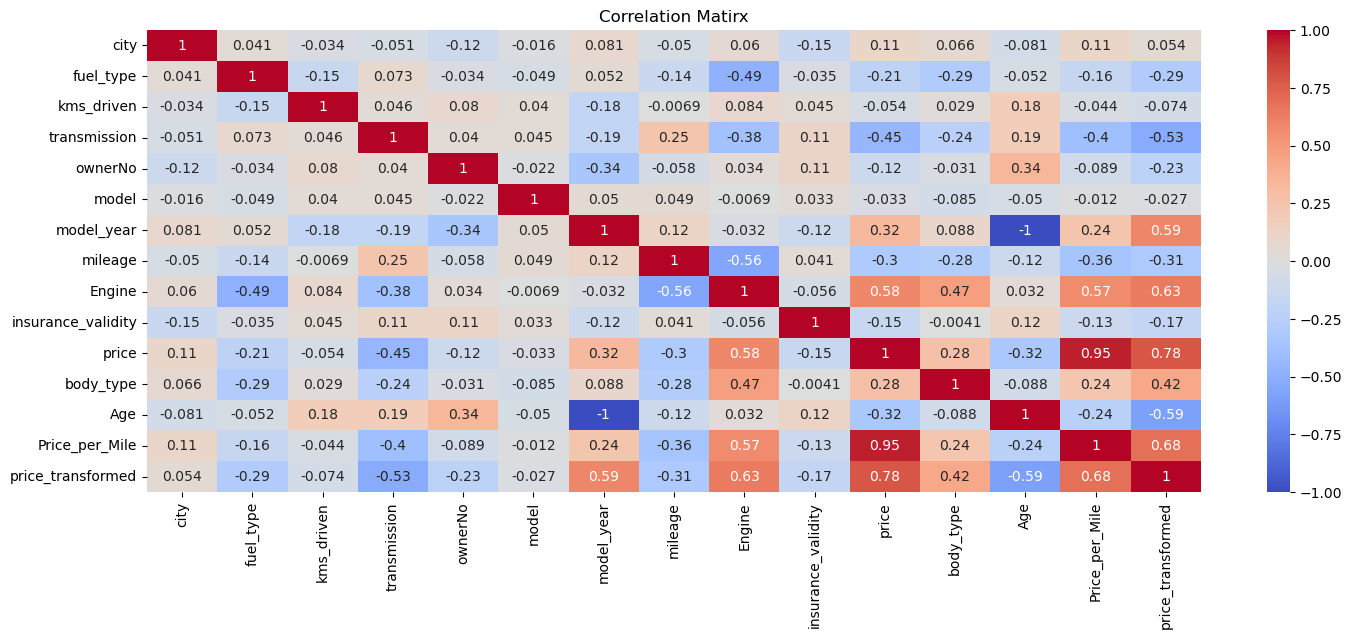

In [84]:
df_corr = df.corr()
plt.figure(figsize=(17,6))
sns.heatmap(df_corr, annot=True, cmap = 'coolwarm')
plt.title("Correlation Matirx")
plt.show()

In [86]:
df = df.drop('Price_per_Mile', axis=1)

In [88]:
df.head()

,city,fuel_type,kms_driven,transmission,ownerNo,model,model_year,mileage,Engine,insurance_validity,price,body_type,Age,price_transformed
0,0,4,120000,1,3,17,2015,23.10,998,2,400000.0,2,8,12.899220
1,0,4,32706,1,2,5,2018,17.00,1497,0,811000.0,6,5,13.606023
2,0,4,11949,1,1,25,2018,23.84,1199,0,585000.0,2,5,13.279367
3,0,4,17794,1,1,7,2014,19.10,1197,0,462000.0,7,9,13.043320
4,0,1,60000,1,1,17,2015,23.65,1248,2,790000.0,6,8,13.579788


In [176]:
# Separate numerical and categorical columns
numerical_cols = ['kms_driven', 'price']
categorical_cols = ['city', 'fuel_type', 'transmission', 'ownerNo', 'model', 'insurance_validity', 'body_type']

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(df)
df_scaled = pd.DataFrame(scaler.transform(df), columns=df.columns)

In [191]:
scaler = StandardScaler()
scaler.fit(df[numerical_cols])

df_scaled = pd.DataFrame(scaler.transform(df[numerical_cols]), columns=numerical_cols)


In [92]:
df_scaled.isnull().sum()

city                  0
fuel_type             0
kms_driven            0
transmission          0
ownerNo               0
model                 0
model_year            0
mileage               0
Engine                0
insurance_validity    0
price                 0
body_type             0
Age                   0
price_transformed     0
dtype: int64

In [186]:
# Combine scaled numerical columns with categorical columns
#df_scaled = pd.concat([pd.DataFrame(df_numerical_scaled, columns=numerical_cols), df[categorical_cols]], axis=1)

In [94]:
print("Original DataFrame:")
print(df)

print("\nScaled DataFrame:")
print(df_scaled)

Original DataFrame:
      city  fuel_type  kms_driven  transmission  ownerNo  model  model_year  \
0        0          4      120000             1        3     17        2015   
1        0          4       32706             1        2      5        2018   
2        0          4       11949             1        1     25        2018   
3        0          4       17794             1        1      7        2014   
4        0          1       60000             1        1     17        2015   
...    ...        ...         ...           ...      ...    ...         ...   
6071     3          4       40000             0        1     17        2017   
6072     3          4       20000             1        1      7        2019   
6073     3          4       40000             1        1     17        2019   
6074     3          4       60000             1        1     17        2010   
6075     3          4       50000             0        3     18        2011   

      mileage  Engine  insuranc

In [197]:
df['kms_driven'] = df_scaled['kms_driven']
df['price'] = df_scaled['price']

In [96]:
df.isnull().sum()

city                  0
fuel_type             0
kms_driven            0
transmission          0
ownerNo               0
model                 0
model_year            0
mileage               0
Engine                0
insurance_validity    0
price                 0
body_type             0
Age                   0
price_transformed     0
dtype: int64

In [98]:
df_scaled

,city,fuel_type,kms_driven,transmission,ownerNo,model,model_year,mileage,Engine,insurance_validity,price,body_type,Age,price_transformed
0,-1.435230,0.745677,0.687813,0.623959,2.617267,0.519327,-0.324030,1.011368,-0.957869,0.903432,-0.419149,-1.091347,0.324030,-0.563240
1,-1.435230,0.745677,-0.365515,0.623959,1.008761,-1.046139,0.557197,-0.548117,0.100376,-1.069453,-0.092858,0.679607,-0.557197,0.315500
2,-1.435230,0.745677,-0.615978,0.623959,-0.599746,1.562970,0.557197,1.200551,-0.531602,-1.069453,-0.272278,-1.091347,-0.557197,-0.090619
3,-1.435230,0.745677,-0.545450,0.623959,-0.599746,-0.785228,-0.617772,-0.011245,-0.535843,-1.069453,-0.369927,1.122345,0.617772,-0.384086
4,-1.435230,-1.324705,-0.036174,0.623959,-0.599746,0.519327,-0.324030,1.151977,-0.427686,0.903432,-0.109530,0.679607,0.324030,0.282883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6008,0.270423,0.745677,-0.277502,-1.602668,-0.599746,0.519327,0.263454,-0.006132,-0.162595,0.903432,-0.319912,1.122345,-0.263454,-0.225156
6009,0.270423,0.745677,-0.518831,0.623959,-0.599746,-0.785228,0.850939,-0.854901,0.299725,0.903432,0.057189,0.679607,-0.850939,0.575947
6010,0.270423,0.745677,-0.277502,0.623959,-0.599746,0.519327,0.850939,0.528183,-0.535843,0.903432,-0.300065,1.122345,-0.850939,-0.167320
6011,0.270423,0.745677,-0.036174,0.623959,-0.599746,0.519327,-1.792741,-0.420290,-0.321649,0.903432,-0.538233,1.122345,1.792741,-1.147577


In [108]:
x = df_scaled.drop(columns = ['price', 'price_transformed'], axis=1)
y = df_scaled['price_transformed']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [110]:
print(f"'xtrain {x_train.shape}")
print(f"'xtest {x_test.shape}")

'xtrain (4810, 12)
'xtest (1203, 12)


In [112]:
models = [
    ('Random Forest', RandomForestRegressor(n_estimators = 400, random_state=56)),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(max_depth = 6, random_state = 56)),
    ('KNN', KNeighborsRegressor(n_neighbors=3, metric='manhattan')),
    ('GradientBoosting', GradientBoostingRegressor(n_estimators= 350, learning_rate= 0.01, random_state= 55)),
    ('xgboost', xgboost.XGBRFRegressor(n_estimators= 350, learning_rate= 0.06 , random_state= 55))
]

In [114]:
for name,model in models:
    print(name)
    print()
    model.fit(x_train, y_train)
    x_pred = model.predict(x_train)
    y_pred = model.predict(x_test)
    print("Mean Squared Error training: ", mean_squared_error(y_train, x_pred))
    print("Mean Squared Error testing: ", mean_squared_error(y_test, y_pred))
    print("\n")
    print("Mean Absolute Error Training: ", mean_absolute_error(y_train, x_pred))
    print("Mean Absolute Error testing: ", mean_absolute_error(y_test, y_pred))
    print("\n")
    print("R-squared (R2) training : ", r2_score(y_train, x_pred)*100,'%')
    print("R-squared (R2) testing : ", r2_score(y_test, y_pred)*100,'%')
    print("\n")

Random Forest

Mean Squared Error training:  0.010420586878944267
Mean Squared Error testing:  0.07665335213988639


Mean Absolute Error Training:  0.06891202583615526
Mean Absolute Error testing:  0.1871193500503669


R-squared (R2) training :  98.96772853406024 %
R-squared (R2) testing :  92.01414094950128 %


Linear Regression

Mean Squared Error training:  0.17642094275128847
Mean Squared Error testing:  0.18001987594992655


Mean Absolute Error Training:  0.3191543280518461
Mean Absolute Error testing:  0.3219829269838962


R-squared (R2) training :  82.52360377472345 %
R-squared (R2) testing :  81.24526435581257 %


Decision Tree

Mean Squared Error training:  0.13025799948887018
Mean Squared Error testing:  0.1568323358424871


Mean Absolute Error Training:  0.27037498234293716
Mean Absolute Error testing:  0.2954051862916099


R-squared (R2) training :  87.09654094872056 %
R-squared (R2) testing :  83.66097641349104 %


KNN

Mean Squared Error training:  0.05776853629277668
Mea

In [116]:
# Create lists to store results
model_names = []
mse_train = []
mse_test = []
mae_train = []
mae_test = []
r2_train = []
r2_test = []

# Iterate over models
for name, model in models:
    model.fit(x_train, y_train)
    x_pred = model.predict(x_train)
    y_pred = model.predict(x_test)
    
    # Append results to lists
    model_names.append(name)
    mse_train.append(mean_squared_error(y_train, x_pred))
    mse_test.append(mean_squared_error(y_test, y_pred))
    mae_train.append(mean_absolute_error(y_train, x_pred))
    mae_test.append(mean_absolute_error(y_test, y_pred))
    r2_train.append(r2_score(y_train, x_pred)*100)
    r2_test.append(r2_score(y_test, y_pred)*100)

# Create DataFrame
results_df = pd.DataFrame({
    "Model": model_names,
    "MSE Train": mse_train,
    "MSE Test": mse_test,
    "MAE Train": mae_train,
    "MAE Test": mae_test,
    "R2 Train (%)": r2_train,
    "R2 Test (%)": r2_test
})

# Print DataFrame
results_df

,Model,MSE Train,MSE Test,MAE Train,MAE Test,R2 Train (%),R2 Test (%)
0,Random Forest,0.010421,0.076653,0.068912,0.187119,98.967729,92.014141
1,Linear Regression,0.176421,0.180020,0.319154,0.321983,82.523604,81.245264
2,Decision Tree,0.130258,0.156832,0.270375,0.295405,87.096541,83.660976
3,KNN,0.057769,0.126870,0.167433,0.250894,94.277404,86.782462
4,GradientBoosting,0.122603,0.129637,0.257104,0.263260,87.854827,86.494271
5,xgboost,0.907709,0.865207,0.698573,0.687239,10.081663,9.861441


In [118]:
model = RandomForestRegressor(n_estimators = 400, random_state = 56)

In [120]:
model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=400, random_state=56)

In [122]:
x_pred = model.predict(x_train)
y_pred = model.predict(x_test)

In [124]:
print("Mean Squared Error training: ", mean_squared_error(y_train, x_pred))
print("Mean Squared Error testing: ", mean_squared_error(y_test, y_pred))
print("\n")
print("Mean Absolute Error Training: ", mean_absolute_error(y_train, x_pred))
print("Mean Absolute Error testing: ", mean_absolute_error(y_test, y_pred))
print("\n")
print("R-squared (R2) training : ", r2_score(y_train, x_pred)*100,'%')
print("R-squared (R2) testing : ", r2_score(y_test, y_pred)*100,'%')

Mean Squared Error training:  0.010420586878944267
Mean Squared Error testing:  0.07665335213988639


Mean Absolute Error Training:  0.06891202583615526
Mean Absolute Error testing:  0.1871193500503669


R-squared (R2) training :  98.96772853406024 %
R-squared (R2) testing :  92.01414094950128 %


In [131]:
with open ("linear_reg_model", 'wb') as sample:
    pickle.dump(model, sample)

NameError: name 'pickle' is not defined